# **Introducción a la base de datos**

La base de datos titulado "Corn Leaf Number Images and Annotations" (Imágenes y anotaciones del número de hojas de maíz) creado por Miao, se conecentra en imagenes y anotaciones relacionadas con el número de hojas de plantas de maíz. Contiene una colección de imágenes de hojas de maíz, obtenidas de diversas fuentes y condiciones de cultivo para diferentes genotipos. Estas imágenes están acompañadas de anotaciones que indican el número de hojas presentes en cada imagen en un archivo csv.

El principal propósito de este conjunto de imagenes es proporcionar un recurso para los investigaodres interesados y en el campo de la detección y el recuento automatizado del número de hojas en las plantas de maíz. Este tipo de información es fundamenta para el monitoreo del crecimiento y desarrollo de las plantas de maíz, y puede ser empleado en aplicaciones agrícolas.

La disponibilidad de imágenes etiquetadas con anotaciones precisas de hojas de maíz permitirá el entrenamiento y la evaluación de algoritmos de visión por computadora y técnicas de aprendizaje automático para el reconocimiento y la cuantificación del número de hojas. Esto puede facilitar el desarrollo de sistemas automáticos de monitoreo y análisis de cultivos de maíz, lo que a su vez puede tener aplicaciones prácticas en la agricultura de precisión, la investigación agrícola y el seguimiento del crecimiento de las plantas.

La base de datos está conformada por 122,290 imagenes que vienen etiquetadas de con la siguiente información:

*   Identificador del invernadero
*   Fecha y hora de la captura de la imagen
*   Angulo de la fotografia
*   Indica si la imagen fue recortada

Para este proyecto, se han seleccionado un total de 16 imágenes de plantas de maíz de la misma especie. Estas imágenes fueron capturadas desde un ángulo de 45 grados, lo que permite obtener una perspectiva consistente y comparativa de las hojas de maíz en diferentes etapas de crecimiento. Se ha establecido una clasificación en función de las semanas de crecimiento, dividiendo las imágenes en un total de 4 semanas. Cada semana se han agregado 4 imágenes correspondientes a diferentes momentos de captura. Estas imágenes se han organizado siguiendo la fecha de su captura, lo que nos proporciona una referencia temporal para observar la evolución de las hojas de maíz a lo largo del tiempo.Este enfoque de clasificación semanal nos permite analizar el desarrollo y cambios en el número de hojas de maíz a medida que las plantas avanzan en su crecimiento. Al agregar nuevas imágenes cada semana, podemos capturar y documentar la progresión gradual de las hojas, proporcionando un conjunto de datos más completo y detallado para su posterior análisis y estudio.

In [ ]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

Data = 'CornLeaf'

def load_images(image_path=Data):
    target_size = (200, 300)
    images = []

    image_dirs = [image for image in os.listdir(image_path) if not image.startswith('.')]
    image_dirs.sort()  # Ordenar las imágenes por nombre
    for image_dir in image_dirs:
        image = Image.open(os.path.join(image_path, image_dir)).convert("L")
        image = image.resize(target_size)  # Redimensionar la imagen al tamaño deseado
        images.append(np.asarray(image, dtype=np.uint8))

    return images
num_images = len(images)

def mostrar_imagenes(images):
    num_images = len(images)
    fig, axs = plt.subplots(num_images // 4, 4, figsize=(12, 3 * (num_images // 4)))

    for i, ax in enumerate(axs.flat):
        ax.imshow(images[i], cmap='gray')
        ax.axis('off')
        ax.set_title(f'Semana {i // 4 + 1}')
        ax.set_aspect('equal')

    plt.tight_layout()
    plt.show()


Antes de aplicar el Análisis de Componentes Principales (PCA), se lleva a cabo un proceso matemático que implica convertir las 16 imágenes en una matriz de datos. Este paso se realiza mediante la función "convert_images_to_matrix".

La función "convert_images_to_matrix" toma las 16 imágenes como entrada y realiza una transformación en cada imagen para convertirla en una representación numérica adecuada. Esto implica tomar cada imagen y descomponerla en una matriz de píxeles, donde cada píxel se representa mediante un valor numérico que indica su intensidad o color.

Una vez que se ha generado la matriz de datos a partir de las imágenes, se puede aplicar el Análisis de Componentes Principales (PCA). El PCA es una técnica estadística utilizada para reducir la dimensionalidad de conjuntos de datos complejos, identificando las componentes principales que explican la mayor parte de la variabilidad en los datos.

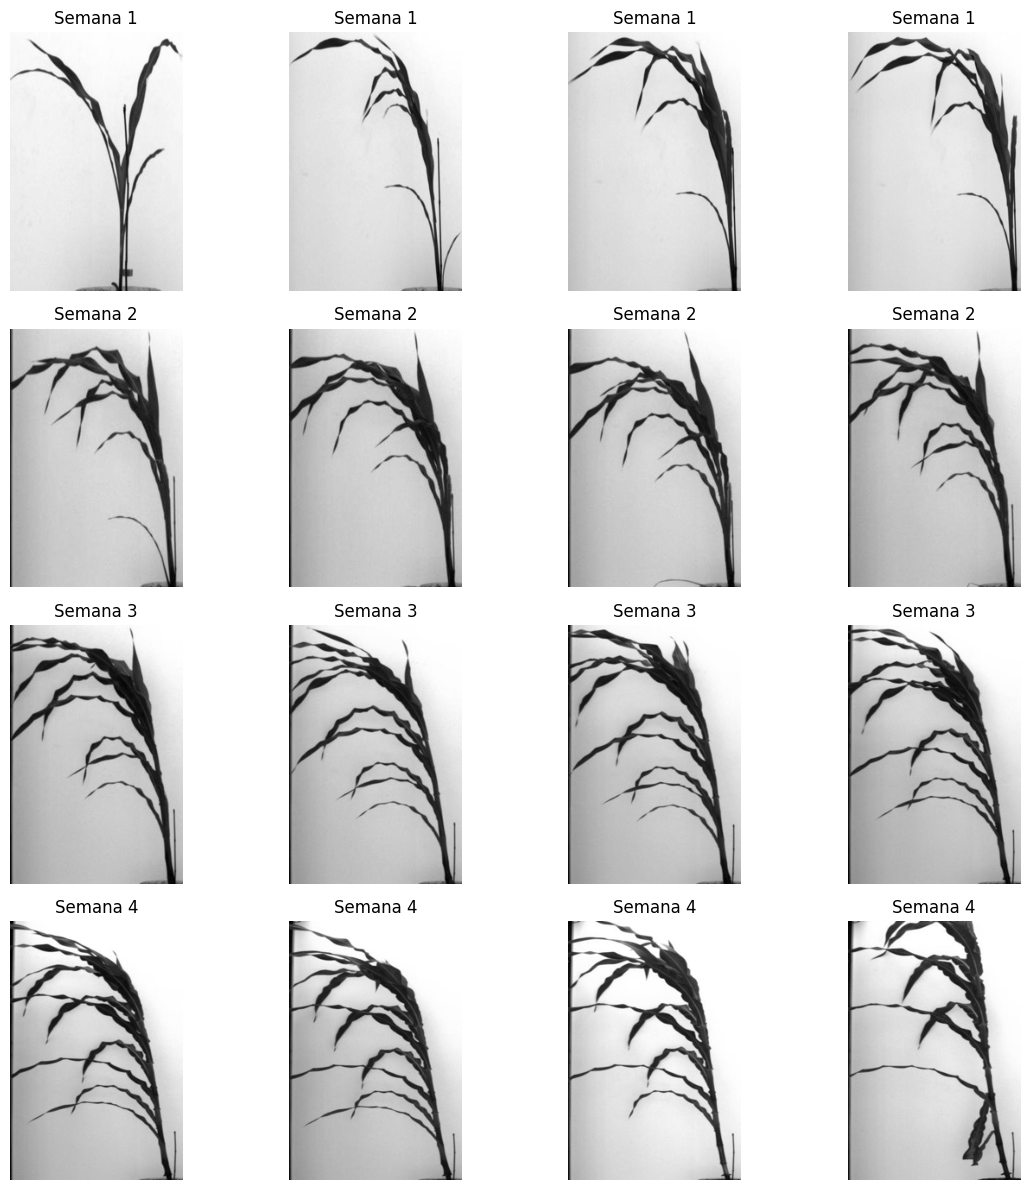

In [ ]:


def convert_images_to_matrix(images): # Crear una matriz vacía con el tamaño de la primera imagen
    matrix = np.empty((images[0].size, 0), dtype=np.uint8)

    for i in images:
        vector = np.asarray(i).reshape(-1, 1)  # Convertir cada imagen en un vector y darle forma de columna
        matrix = np.hstack((matrix, vector))    # Apilar el vector como una columna en la matriz

    return matrix

def number_of_components(eigenvalues, variance=0.95):
    for i, eigen_value_cumsum in enumerate(np.cumsum(eigenvalues) / np.sum(eigenvalues)):  # Calcular la suma acumulada normalizada de los autovalores
        if eigen_value_cumsum > variance:# Verificar si se ha superado la varianza deseada
            return i  # Devolver el número de componentes necesarios

def pca(x, num_components=0):
    [fil, col] = x.shape # Obtener las dimensiones de la matriz de entrada

    if (num_components <= 0) or (num_components > fil):
        num_components = fil # Establecer el número de componentes como el número de filas si no se especifica o es inválido
    media = x.mean(axis=1, keepdims=True)# Calcular el vector de medias de la matriz de entrada
    x = x - media # Restar el vector de medias a la matriz de entrada para centrar los datos

    if fil > col:
        S = x.T @ x # Calcular la matriz de covarianza para dimensiones mayores o iguales a la cantidad de características
        [eigenvalues, eigenvectors] = np.linalg.eigh(S)  # Calcular los autovalores y autovectores de la matriz de covarianza

    else:
        S = x @ x.T # Calcular la matriz de covarianza para dimensiones menores a la cantidad de características
        [eigenvalues, eigenvectors] = np.linalg.eigh(S)  # Calcular los autovalores y autovectores de la matriz de covarianza
        eigenvectors = x.T @ eigenvectors# Transformar los autovectores a las dimensiones originales

        for i in range(fil):
            eigenvectors[:, i] = eigenvectors[:, i] / np.linalg.norm(eigenvectors[:, i]) # Normalizar los autovectores

    idx = np.argsort(-eigenvalues) # Ordenar los autovalores en orden descendente
    eigenvalues = eigenvalues[idx]# Ordenar los autovalores según el orden de los índices
    eigenvectors = eigenvectors[:, idx]# Ordenar los autovectores según el orden de los índices

    num_components = number_of_components(eigenvalues)# Calcular el número de componentes necesarios

    eigenvalues = eigenvalues[0:num_components].copy() # Obtener solo los autovalores necesarios
    eigenvectors = eigenvectors[:, 0:num_components].copy()# Obtener solo los autovectores necesarios
    return [eigenvalues, eigenvectors, media] # Devolver los autovalores, autovectores y el vector de medias

# Cargar imágenes
images = load_images()
num_images = len(images)

mostrar_imagenes(images)

# Convertir las imágenes en una matriz de columnas
matrix = convert_images_to_matrix(images)

# Aplicar PCA a la matriz
eigenvalues, eigenvectors, media = pca(matrix.T)  # Transponer la matriz para que las columnas sean las imágenes

# Proyectar los datos en el nuevo espacio de características
projected_data = eigenvectors.T @ (matrix - media.T)

# Clases de imágenes (semana 1, semana 2, semana 3, semana 4)
image_classes = np.repeat(np.arange(num_images // 4), 4)



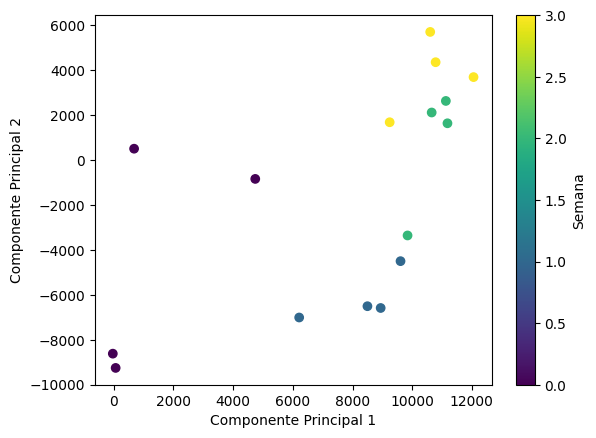

In [ ]:
# Crear una gráfica de dispersión
plt.scatter(projected_data[0], projected_data[1], c=image_classes, cmap='viridis')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(label='Semana')
plt.show()

## **Análisis de resultados**

En este rabajo, se aplica PCA (Análisis de Componentes Principales) a la matriz de imágenes utilizando la función pca. Esta función calcula los vectores propios (eigenvectors) y los valores propios (eigenvalues) de la matriz conformada por las 16 imagenes cargadas de una base de datos. El cálculo de estos valores proporciona información sobre las principales direcciones de variación en el conjunto de datos de imágenes.

Una vez obtenidos los eigenvectors y eigenvalues, se proyecta la matriz de imágenes en el nuevo espacio de características definido por los eigenvectors. Esta proyección se realiza multiplicando la matriz de imágenes por los eigenvectors seleccionados.

Después de la proyección, se obtienen los datos proyectados en un espacio bidimensional. Para visualizar estos datos, se crea una gráfica de dispersión en la que cada punto representa una imagen. Los datos proyectados se colocan en los ejes x e y, correspondientes a los dos componentes principales más significativos. Además, se asigna un color a cada punto según la clase a la que pertenece la imagen (semana 1, semana 2, semana 3, semana 4).


La gráfica de dispersión proporcionada tiene como objetivo facilitar la identificación de la agrupación de imágenes en el nuevo espacio de características, en función de su similitud. Cuando los puntos se encuentran cercanos en el gráfico, esto indica que las imágenes comparten características similares y, por lo tanto, pueden ser clasificadas según su semana de crecimiento, tal como se ha llevado a cabo en el presente estudio. Es fundamental tener en cuenta que, con el fin de llevar a cabo un análisis más exhaustivo y obtener resultados más confiables, se requiere disponer de una base de datos lo suficientemente amplia que contenga un número adecuado de imágenes de la misma especie en cada semana. Esto permitirá capturar de manera más precisa las variaciones características presentes en cada semana y, en consecuencia, realizar una clasificación más precisa y acertada. Por lo tanto, es crucial contar con una base de datos rica y diversa para garantizar la calidad y fiabilidad de los resultados obtenidos.

En el contexto del estudio en cuestión, se pudo observar que los datos se agruparon de manera coherente para la semana correspondiente. Esta observación confirma la utilidad de la gráfica de dispersión y respalda la validez de los resultados obtenidos hasta el momento. Al identificar las agrupaciones de datos según su semana de crecimiento, se proporciona una base sólida para el análisis y la comprensión de los patrones de desarrollo y evolución en el conjunto de imágenes estudiado.

# **Conclusiones**

Se recomiendae tener en cuenta la normalización de las dimensiones de las imágenes. Si las imágenes tienen dimensiones diferentes, esto puede introducir sesgos en el análisis y dificultar la comparación directa entre ellas. Por lo tanto, es necesario realizar una transformación o redimensionamiento previo de las imágenes para asegurar una dimensión única antes de aplicar la técnica de PCA.

Si se requiere aplicar PCA para mi trabajo de tesis, se deben considerar aspectos importantes como la disponibilidad de una base de datos adecuada con suficientes imágenes por semana y la normalización de las dimensiones de las imágenes para obtener resultados más robustos y significativos.



**Referencias: **
https://github.com/svetlana-topalova/eigenfaces/blob/master/Eigenfaces.ipynb

Miao, Chenyong (2020). corn leaf number images and annotations. figshare. Dataset. https://doi.org/10.6084/m9.figshare.13056512.v1